## Tugas Praktikum

Sabna Devi Kumalasari / 2141720009

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

In [75]:
#import pustaka

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

dpath = 'data/voice.csv'
df = pd.read_csv(dpath)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [76]:
# encode (mengubah male(0) dan female(1))
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

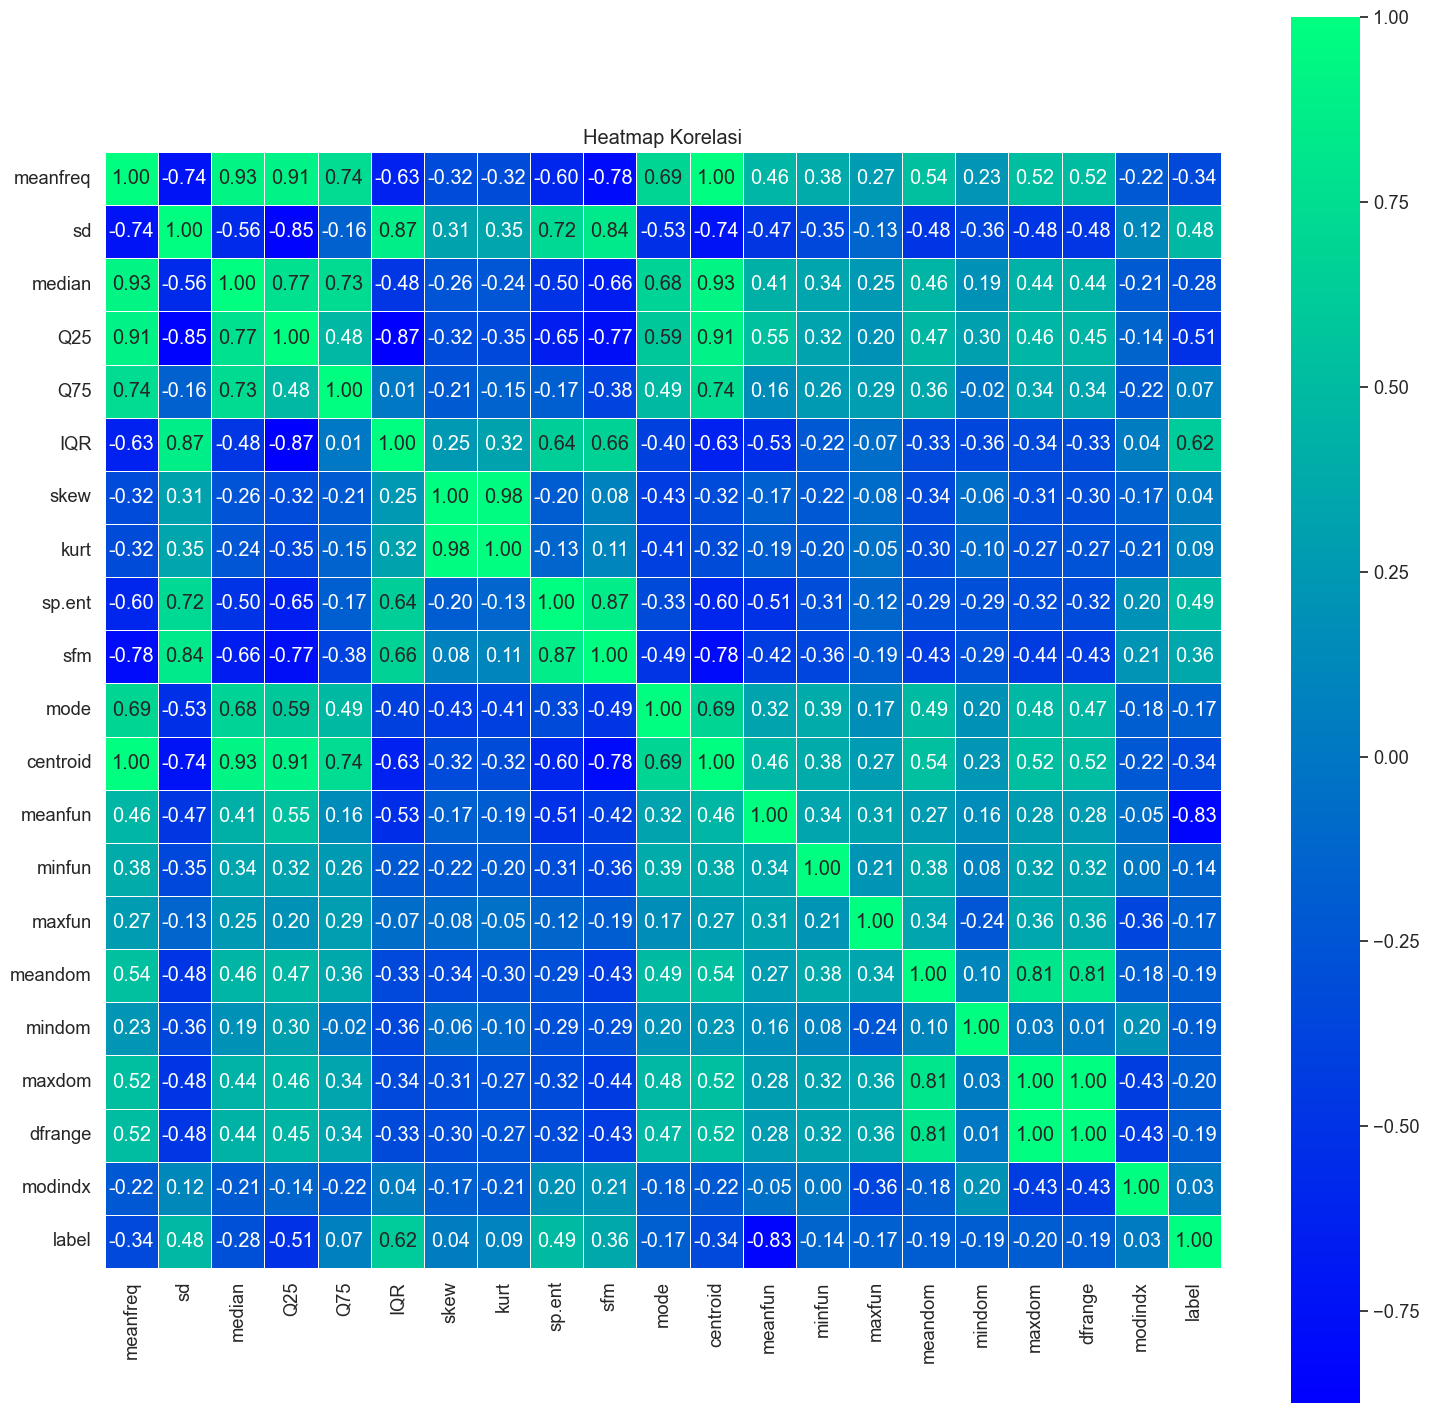

In [77]:
#membuat heatmap
plt.figure(figsize=(18, 18))
corr_matrix = df.corr() 
sns.set(font_scale=1.2) 
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='winter',
            linewidths=0.5, 
            fmt=".2f",
            cbar=True, 
            square=True) 

plt.title('Heatmap Korelasi') 
plt.show()

In [78]:
df.drop(['dfrange', 'centroid'], axis=1, inplace=True)

In [79]:
#memisahkan fitur(x) dan label(y)
X = df[df.columns.difference(['label'])]
y = df['label']

In [81]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.21477826, -2.57610164, -5.69360723, ...,  0.4715753 ,
         2.29330585, -0.03908279],
       [-0.25848536, -2.48688452, -5.58898726, ...,  0.59443122,
         4.54805598, -0.06523603],
       [ 0.90932569, -2.7069865 , -3.92869875, ...,  0.39826097,
         6.51365636, -1.08373029],
       ...,
       [ 2.49266553, -2.1990394 , -0.01712269, ...,  1.38585653,
        -0.29804429,  1.15019826],
       [ 2.15365344, -1.99185206, -0.20402146, ...,  1.50571108,
        -0.36536651,  1.22984967],
       [ 2.25467137, -1.44608897,  1.10267866, ...,  1.08912637,
        -0.33848726,  0.97175912]])

Text(0, 0.5, 'no. of persons')

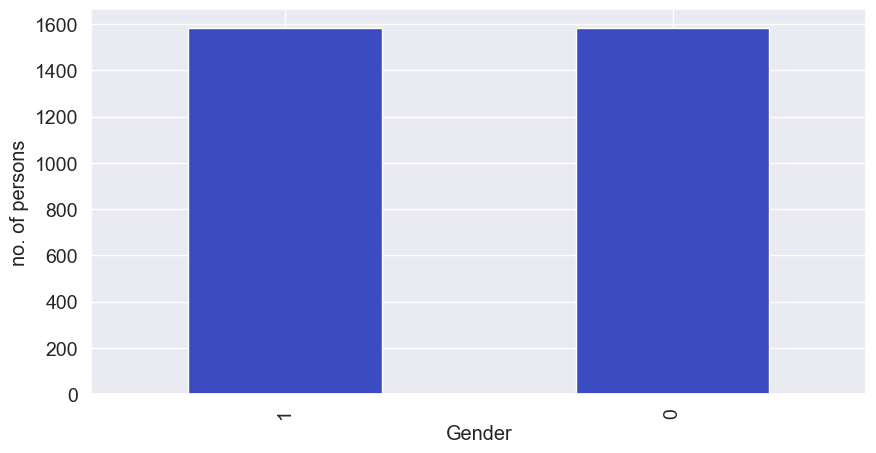

In [82]:
df['label'].value_counts().plot(kind='bar',figsize = (10,5),fontsize = 14,colormap='coolwarm')
plt.xlabel('Gender')
plt.ylabel('no. of persons')


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [121]:
#import SVM
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC()
#menghitung akurasi
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {int(accuracy * 100)}%')

#laporan klasifikasi
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)

#matriks kebingungan
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Accuracy Score: 97%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1426
           1       0.98      0.83      0.90       246

    accuracy                           0.97      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.97      0.97      0.97      1672

Confusion Matrix:
 [[1422    4]
 [  43  203]]


2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    - Menggunakan data spam.csv
    - Fitur CountVectorizer dengan mengaktifkan stop_words
    - Evaluasi hasilnya

In [216]:
df = pd.read_csv('data/spam.csv', encoding='latin–1') 
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [217]:
df = df.drop(df.iloc[:, 2:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [218]:
cols = {
    'v1' : 'Labels',
    'v2' : 'Message'
}

df = df.rename(columns=cols)
df.head()

,Labels,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [219]:
labels = {
    'spam' : 1,
    'ham' : 0
}

df['Labels'] = df['Labels'].map(labels)
df.head()

,Labels,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [222]:
X = df['Message'].values
y = df['Labels'].values

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(X)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [224]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

print('training accuracy is --> ',model.score(X_train,y_train) * 100)
print('test accuracy is --> ',model.score(X_test,y_test) * 100)

training accuracy is -->  99.51282051282051
test accuracy is -->  97.54784688995215


3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    - Menggunakan data spam.csv_
    - Fitur TF-IDF dengan mengaktifkan stop_words
    - Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
    - Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(stop_words='english')

In [204]:
X = df['Message'].values
y = df['Labels'].values

X = cv.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

model = MultinomialNB()
model.fit(X_train, y_train)

print('training accuracy is --> ',model.score(X_train,y_train) * 100)
print('test accuracy is --> ',model.score(X_test,y_test) * 100)

training accuracy is -->  98.17948717948718
test accuracy is -->  96.11244019138756


#### Kesimpulan
Nilai Training accuracy CountVectorizer adalah 99.51%
Nilai Test accuracy CountVectorizer adalah 97.54%
Nilai Training accuracy TF-IDF adalah 98.17%
Nilai Test accuracy TF-IDF adalah 96.11%

dalam studi kasus ini perbandingan akurasi antara CountVectorizer dan TF -IDF tidak jauh berbeda. Namun, jika berurusan dengan dataset besar atau kata-kata yang kurang umum tetapi informatif, TF-IDF lebih unggul.
